# Анализ игровой индустрии

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

План: Откроем и изучим датасет, произведем предобработку данных, проведием исследовательский анализ данных, составим портрет пользователя каждого региона, проверим несколько гипотез, напишим общий вывод

Цель проекта: Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import warnings
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [9]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

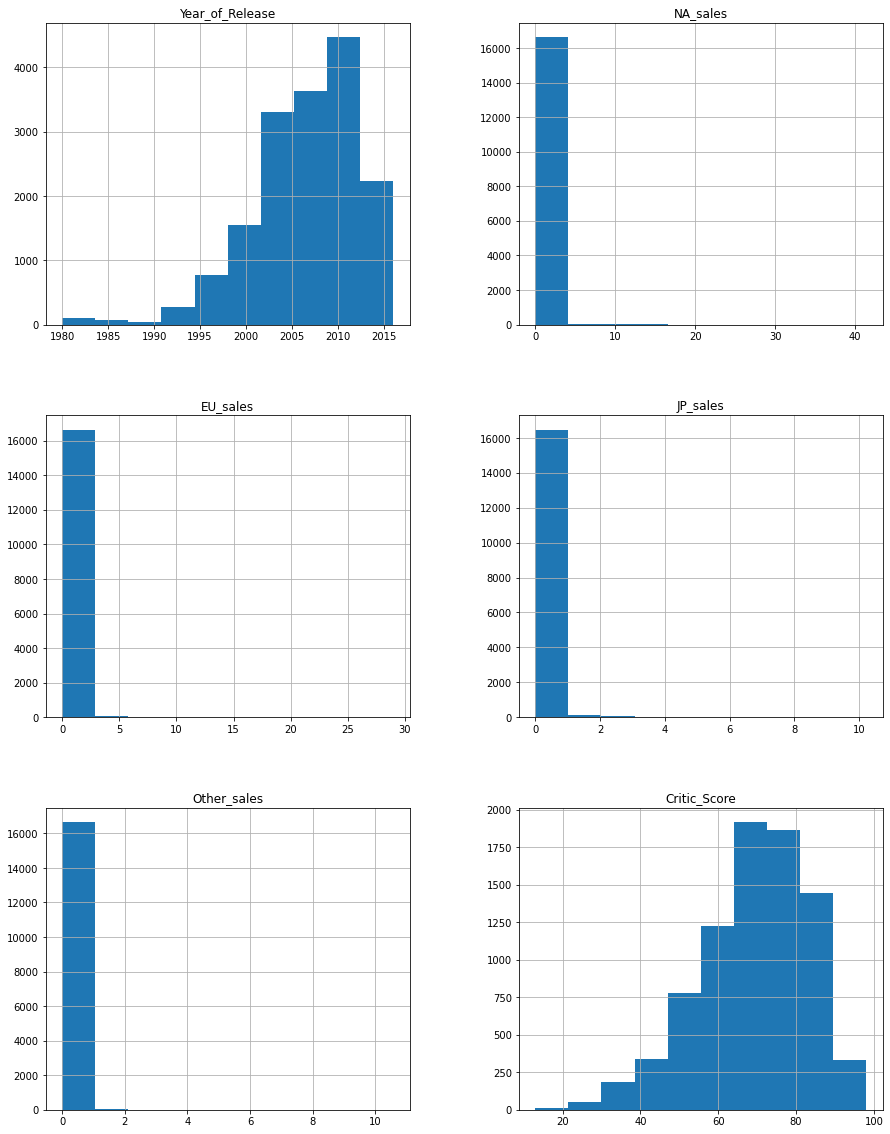

In [10]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Замените названия столбцов (приведите к нижнему регистру)

In [11]:
data.columns = data.columns.str.lower()

#### Обработайте пропуски при необходимости

Что имелось ввиду "tbd" данных нет поэтому заменим значение на NaN

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

Пропуски годов заполню так, если у игры несколько выходов на разных платформах и там есть год выхода то в пропуск подставляю медианное значение

In [13]:
for ds_name in data[data['year_of_release'].isnull()]['name'].unique():
    if data.loc[(data['name'] == ds_name) & (~data['year_of_release'].isnull()), 'year_of_release'].count() >=1:
        ds_year = stat.mode(data.loc[(data['name'] == ds_name) & (~data['year_of_release'].isnull()), 'year_of_release'])
        data.loc[(data['name'] == ds_name) & (data['year_of_release'].isnull()), 'year_of_release'] = ds_year
    else:
        data = data[~((data['name'] == ds_name) & (data['year_of_release'].isnull()))]

Удалю строки с пропуском названия игры

In [14]:
data = data[~data['name'].isnull()] 

Заменим пропуски в столбце RATING на значение 'Unknown'

In [17]:
data['rating'] = data['rating'].fillna('Unknown')

In [19]:
#Код ревьювера
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         9027
rating                0
dtype: int64

#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Столбец с годами поменяю на INT и столбец с очками пользователей поменяю на FLOAT т.к. потом нам с этим столбцом работать, а OBJECT нам этого не позволит

In [20]:
data['user_score'] = data['user_score'].astype('float64')

In [21]:
data['year_of_release'] = data['year_of_release'].astype('int64')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [23]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [24]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


### Проведем исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [28]:
data.pivot_table(index=['year_of_release'], values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:ylabel='year_of_release'>

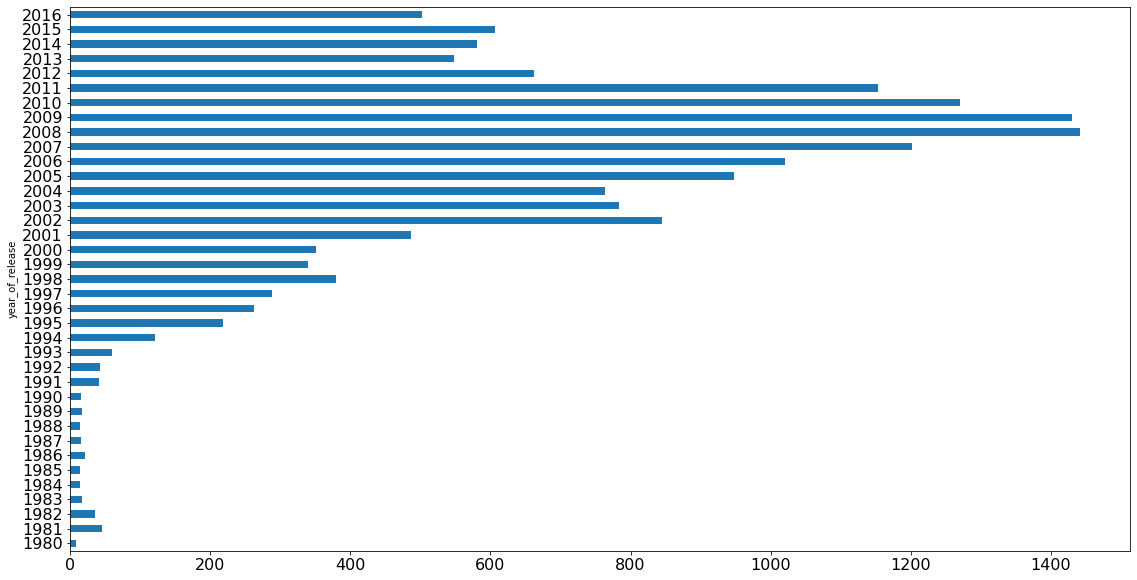

In [27]:
data.pivot_table(index=['year_of_release'], values='name', aggfunc='count').plot(kind= 'barh', figsize=(19,10), legend = False, fontsize = 16)

Видим что с 1994 года начинается бум создания видоигр и достигает своего пика в 2008-2009 годах и дальше с 2012 года резкое снижение производства видеоигр 

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Смотрим как менялись продажи по платформам

In [41]:
pd.set_option('display.max_rows', None)
 
pd.set_option('display.max_columns', None)
 
pd.set_option('display.max_colwidth', None)

data.pivot_table(index=['year_of_release', 'platform'], values='all_sales', aggfunc='sum')

all_sales
year_of_release platform           
1980            2600          11.38
1981            2600          35.68
1982            2600          28.88
1983            2600           5.84
                NES           10.96
1984            2600           0.27
                NES           50.08
1985            2600           0.45
                DS             0.02
                NES           53.44
                PC             0.04
1986            2600           0.67
                NES           36.41
1987            2600           1.94
                NES           19.76
1988            2600           0.74
                GB             1.43
                NES           45.01
                PC             0.03
1989            2600           0.63
                GB            64.97
                NES            7.85
1990            GB             4.89
                GEN            2.60
                NES           15.73
                SNES          26.15
1991            GB             5.57
                GEN            4.33
                NES            6.11
                SNES          16.22
1992            GB            25.49
                GEN           12.64
                GG             0.04
                NES            1.98
                PC             3.03
                SNES          32.98
1993            GEN            0.65
                NES            3.61
                NG             0.21
                SCD            1.50
                SNES          40.02
1994            2600           2.53
                3DO            0.02
                GB            12.18
                GEN            8.13
                NES            0.11
                NG             0.80
                PC            12.87
                PS             6.03
                SAT            3.65
                SCD            0.36
                SNES          35.08
1995            3DO            0.08
                GB             3.60
                NG             0.33
                PC             4.22
                PS            35.96
                SAT           11.57
                SNES          32.20
                TG16           0.16
1996            GB            36.03
                N64           34.10
                NG             0.10
                PC            10.58
                PCFX           0.03
                PS            94.70
                SAT            7.69
                SNES          15.92
1997            GB             6.37
                N64           39.50
                PC            11.27
                PS           136.17
                SAT            6.77
                SNES           0.99
1998            DC             3.38
                GB            26.90
                N64           49.24
                PC             3.26
                PS           169.49
                SAT            3.82
                SNES           0.22
1999            DC             5.16
                GB            38.00
                N64           58.01
                PC             4.74
                PS           144.53
                SAT            0.09
                SNES           0.26
                WS             0.46
2000            3DS            0.02
                DC             5.99
                GB            19.76
                GBA            0.07
                N64           33.97
                PC             4.66
                PS            96.37
                PS2           39.17
                WS             0.68
                XB             0.99
2001            DC             1.07
                GB             9.24
                GBA           61.53
                GC            26.62
                N64            3.25
                PC             5.47
                PS            35.59
                PS2          166.43
                WS             0.28
                XB            23.82
2002            DC            

Посмотрим рейтинг количества продаж по всем платформам

In [42]:
data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales')

,all_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,28.35


Построим распределение по годам по 10 самым продаваемым платформам

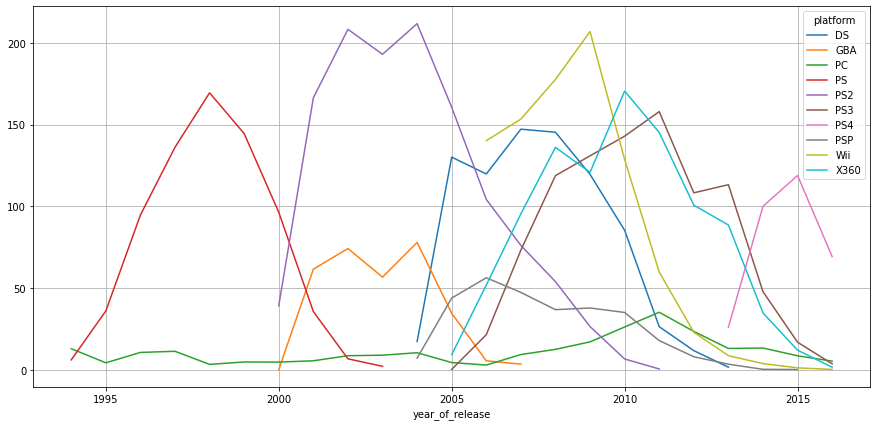

In [43]:
data.query('1994 <= year_of_release and platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "PC"]').pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

Узнаем средний срок жизни платформы с момента старта продаж первых игр и до года прекращения продаж 

In [44]:
median_year = []
for ds_platform in data['platform'].unique():
    start_year = data[data['platform'] == ds_platform]['year_of_release'].min()
    end_year = data[data['platform'] == ds_platform]['year_of_release'].max()
    median_year.append(end_year - start_year)

In [45]:
stat.median(median_year)

8

В среднем платформы живут 8 лет.

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

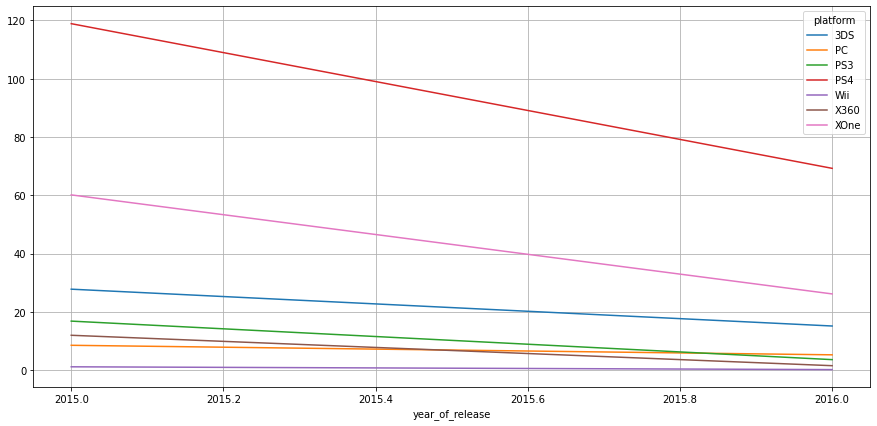

In [49]:
data.query('2015 <= year_of_release and platform in ["X360", "PS3", "Wii", "PS4", "PC", "3DS", "XOne"]').pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

Прогноз на 2017 год такой:
1) WII, X360 скорее всего продаж практически не будет и они уйдут с рынка
2) Для PS3 еще какие-то продажи будут но год так же будет завершающим
3) Для рынка PC продажи незначительно уменьшатся или останутся на том же уровнем
4) Для PS4, 3DS, XOne нисходящий тренд, продажи уменьшатся согласно динамикт за 2015,2016 год
Если подытожить игровая индустрия переживает не самые лучшие времена и общий тренд продаж нисходящий.

In [30]:
actual_data = data.query('2015 <= year_of_release')

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

<AxesSubplot:ylabel='platform'>

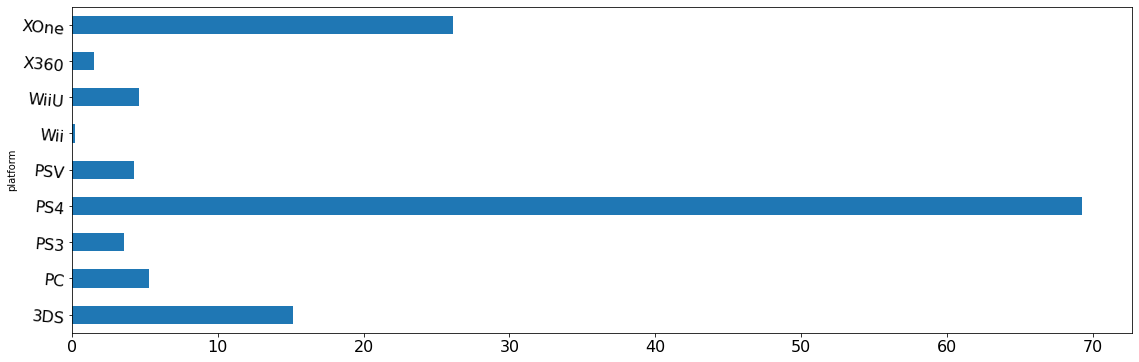

In [32]:
data.query('2016 == year_of_release').pivot_table(index='platform', values='all_sales', aggfunc='sum').plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)

Судя по графика самые потенциально прибыльные за 2016 год это Xone, PS4 и 3DS. Исходя из предыдущего графика тренд по прибыльности у всех нисходящий.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

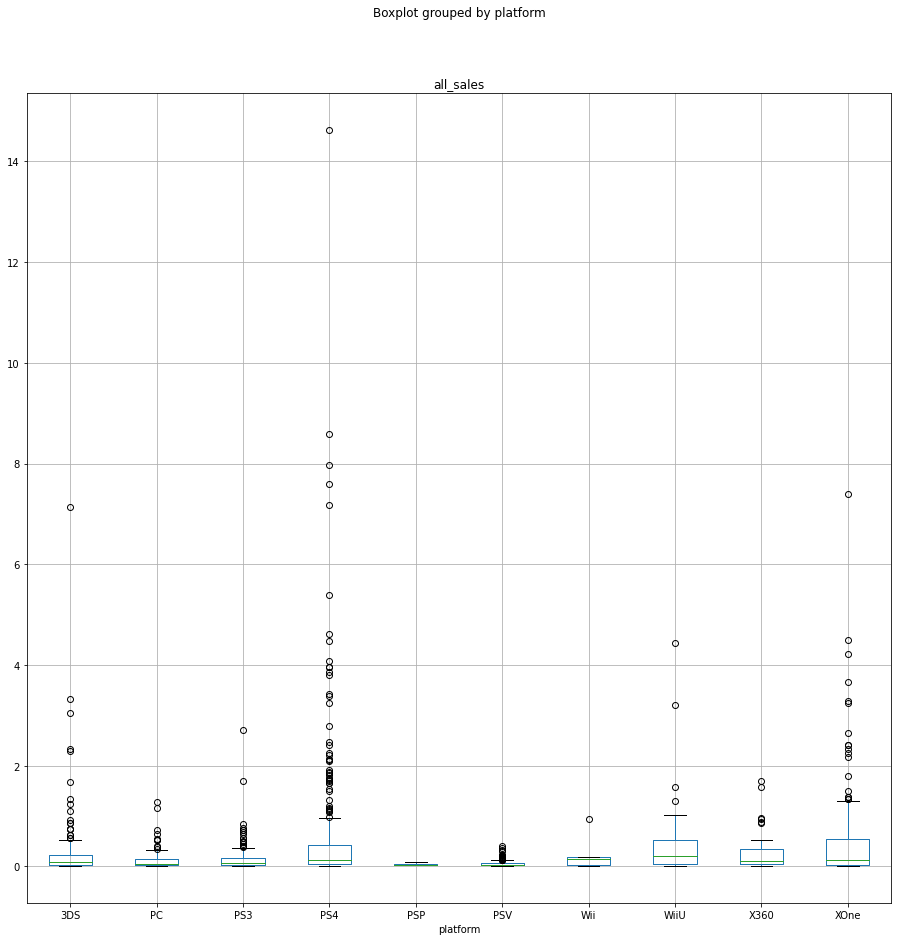

In [36]:
actual_data.boxplot(column='all_sales', by='platform', figsize = (15,15)) 

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

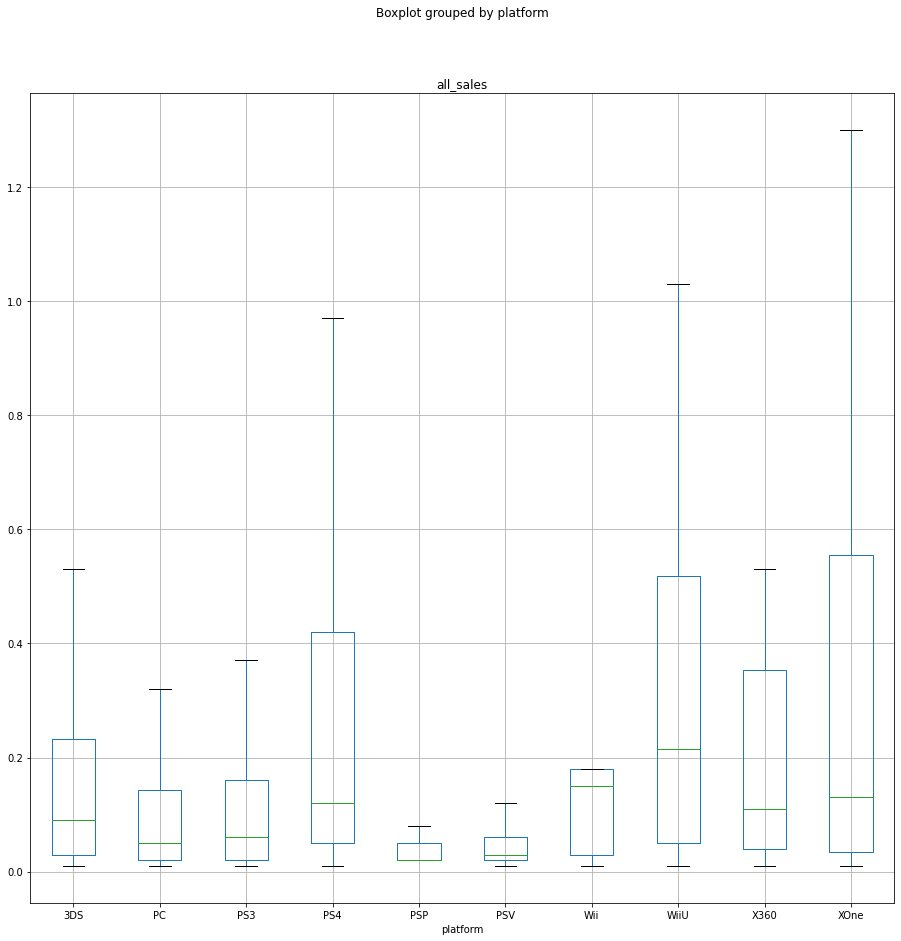

In [37]:
actual_data.boxplot(column='all_sales', by='platform', figsize = (15,15), showfliers=False) 

In [39]:
actual_data.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70


Видим что у каждой платформы есть выбросы, это игры Бестселлеры которые делают значительную часть выручки.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

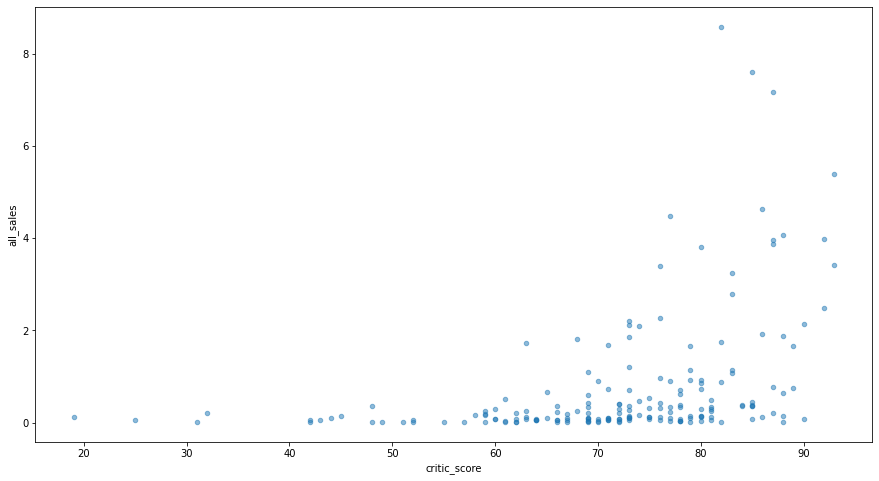

In [32]:
actual_data[(actual_data['platform'] == 'PS4') & (~actual_data['critic_score'].isnull()) & (~actual_data['user_score'].isnull())].plot(kind='scatter', y='all_sales' , x='critic_score', alpha=0.5, figsize=(15,8))

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

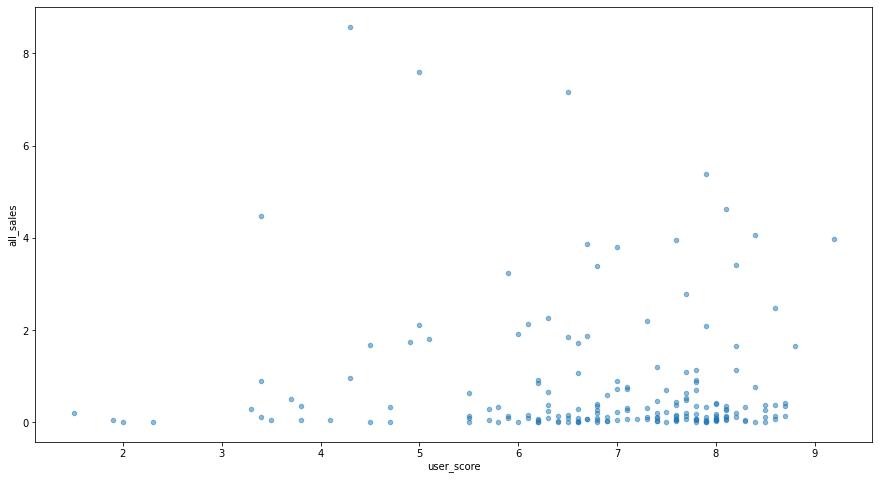

In [33]:
actual_data[(actual_data['platform'] == 'PS4') & (~actual_data['critic_score'].isnull()) & (~actual_data['user_score'].isnull())].plot(kind='scatter', y='all_sales' , x='user_score', alpha=0.5, figsize=(15,8))

In [34]:
actual_data[(actual_data['platform'] == 'PS4') & (~actual_data['critic_score'].isnull()) & (~actual_data['user_score'].isnull())][['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.533330,0.392074
user_score,0.533330,1.000000,-0.064368
all_sales,0.392074,-0.064368,1.000000


Оставив данные по PS4 и отбросив пропуски в столбцах критики и пользователи мы получаем результат что на продажи оценки пользователей вообще не влияют, а оценки критиков влияют средне выраженно.

#### Соотнесите выводы с продажами игр на других платформах.

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

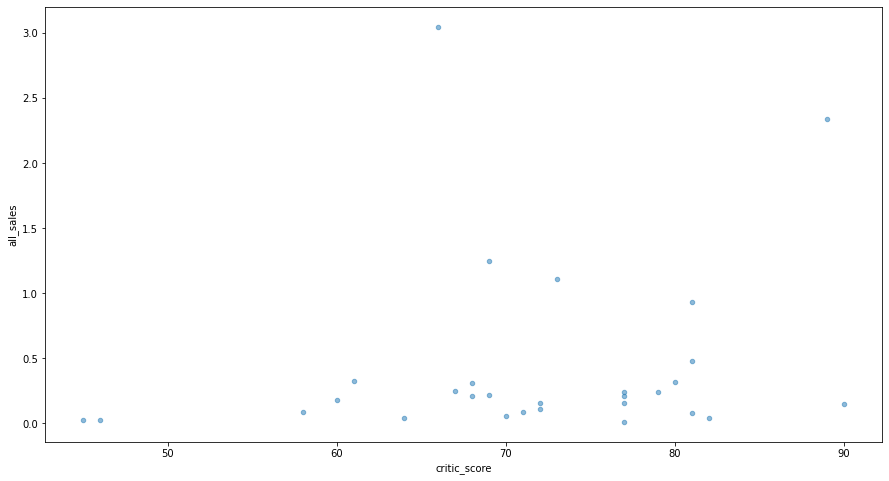

In [42]:
actual_data[(actual_data['platform'] == '3DS') & (~actual_data['critic_score'].isnull()) & (~actual_data['user_score'].isnull())].plot(kind='scatter', y='all_sales' , x='critic_score', alpha=0.5, figsize=(15,8))

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

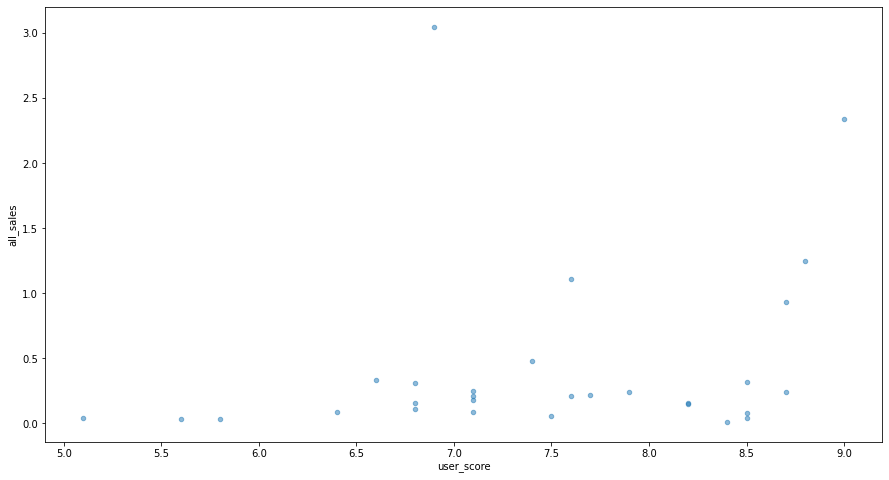

In [43]:
actual_data[(actual_data['platform'] == '3DS') & (~actual_data['critic_score'].isnull()) & (~actual_data['user_score'].isnull())].plot(kind='scatter', y='all_sales' , x='user_score', alpha=0.5, figsize=(15,8))

In [40]:
actual_data[(actual_data['platform'] == '3DS') & (~actual_data['critic_score'].isnull()) & (~actual_data['user_score'].isnull())][['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.791853,0.177575
user_score,0.791853,1.000000,0.240477
all_sales,0.177575,0.240477,1.000000


<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

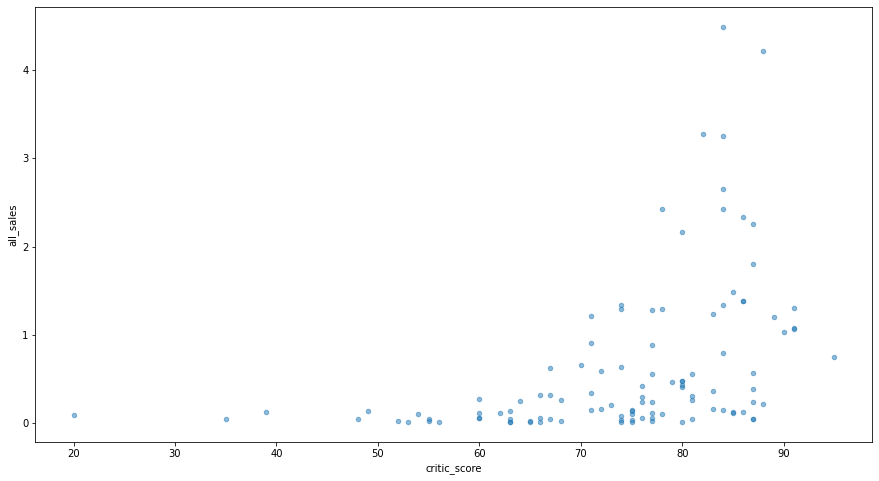

In [44]:
actual_data[(actual_data['platform'] == 'XOne') & (~actual_data['critic_score'].isnull()) & (~actual_data['user_score'].isnull())].plot(kind='scatter', y='all_sales' , x='critic_score', alpha=0.5, figsize=(15,8))

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

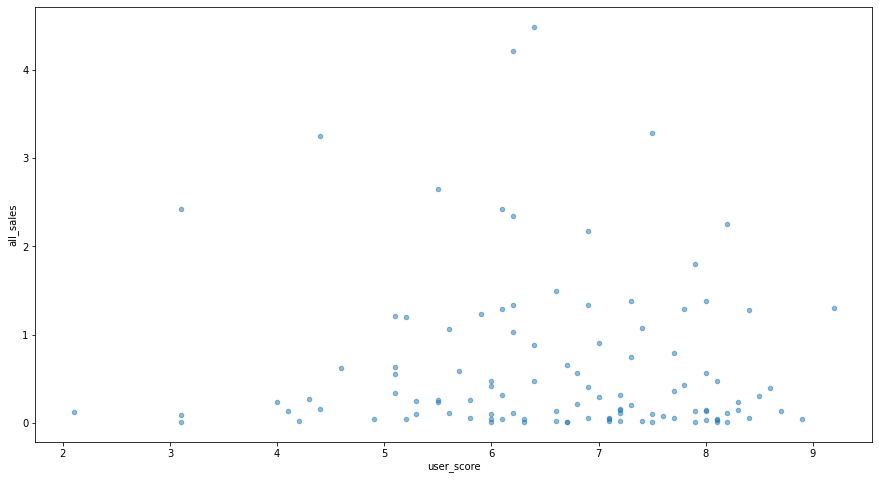

In [45]:
actual_data[(actual_data['platform'] == 'XOne') & (~actual_data['critic_score'].isnull()) & (~actual_data['user_score'].isnull())].plot(kind='scatter', y='all_sales' , x='user_score', alpha=0.5, figsize=(15,8))

In [41]:
actual_data[(actual_data['platform'] == 'XOne') & (~actual_data['critic_score'].isnull()) & (~actual_data['user_score'].isnull())][['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.459443,0.422519
user_score,0.459443,1.000000,-0.068684
all_sales,0.422519,-0.068684,1.000000


Построив корреляцию по другим платформам мы видим что везде она разная. У платформы 3DS оценки пользователей и критиков оказывают слабое влияние на продажи. У платформы XOne результаты похожы на показатели платформы PS4.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посмотрим распределение по количеству игр в разных жанрах

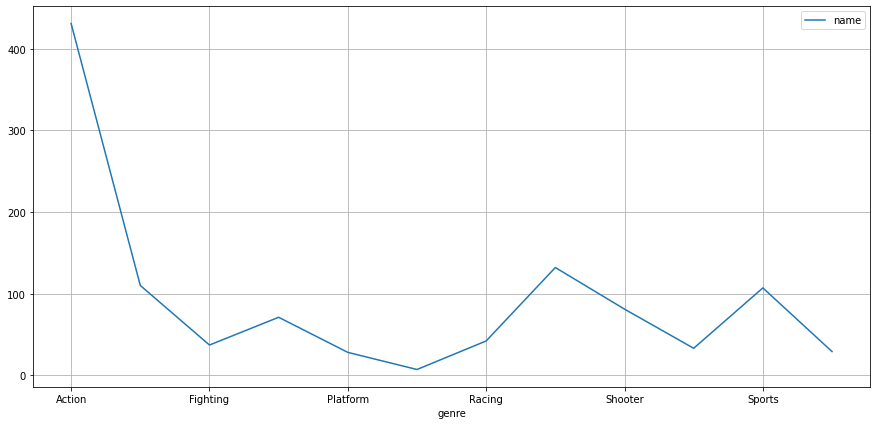

In [46]:
actual_data.pivot_table(index='genre', values='name', aggfunc='count').plot(grid=True, figsize=(15, 7))
plt.show()

Посмотрим на продажи игр по жанрам

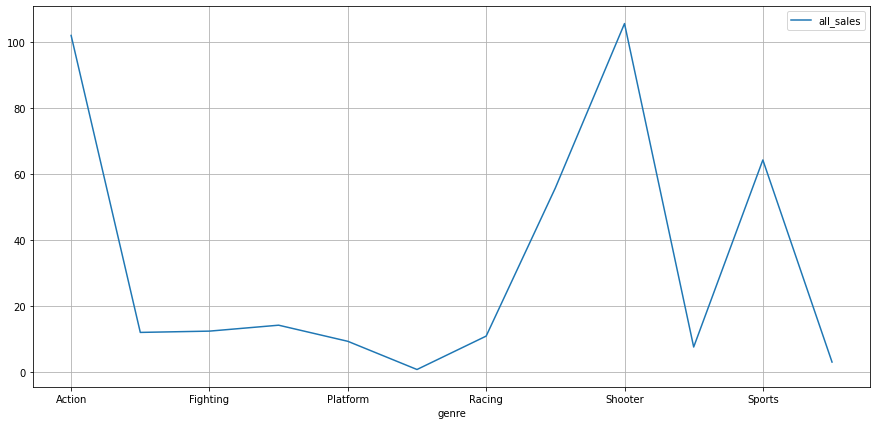

In [47]:
actual_data.pivot_table(index='genre', values='all_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

In [48]:
actual_data.groupby('genre')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,431.0,0.236961,0.525858,0.01,0.0200,0.060,0.190,4.62
Adventure,110.0,0.108909,0.254260,0.01,0.0200,0.030,0.060,1.66
Fighting,37.0,0.334324,0.549695,0.01,0.0400,0.090,0.330,2.78
Misc,71.0,0.199577,0.286718,0.01,0.0300,0.060,0.290,1.58
Platform,28.0,0.331429,0.667387,0.01,0.0575,0.100,0.220,3.21
Puzzle,7.0,0.102857,0.170070,0.01,0.0150,0.030,0.085,0.48
Racing,42.0,0.258571,0.497342,0.01,0.0300,0.055,0.215,2.42
Role-Playing,132.0,0.422879,1.028082,0.01,0.0400,0.115,0.340,7.17
Shooter,81.0,1.305309,2.227297,0.01,0.1300,0.380,1.690,14.63


Самые прибыльные это игры Shooter т.к. у них самый высокий средний и медианный показатель при среднем показателе выпущенном количестве игр. Менее всего прибыльные это жанры Strategy, Puzzle и Adventure

### Составьте портрет пользователя каждого региона

#### Самые популярные платформы (топ-5) 

##### NA

<AxesSubplot:xlabel='platform'>

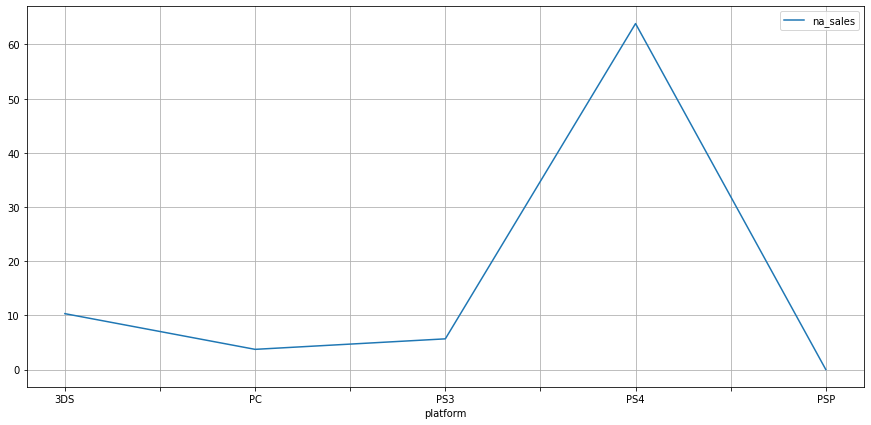

In [53]:
actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').head(5).plot(grid=True, figsize=(15, 7))

##### EU

<AxesSubplot:xlabel='platform'>

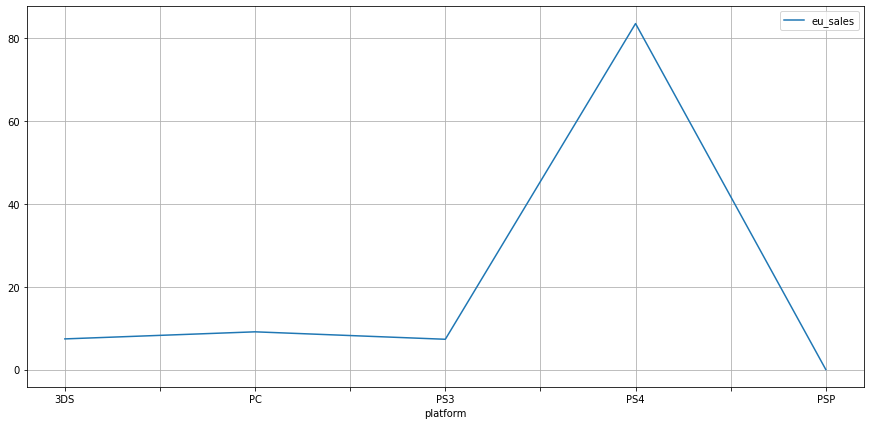

In [54]:
actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').head(5).plot(grid=True, figsize=(15, 7))

##### JP

<AxesSubplot:xlabel='platform'>

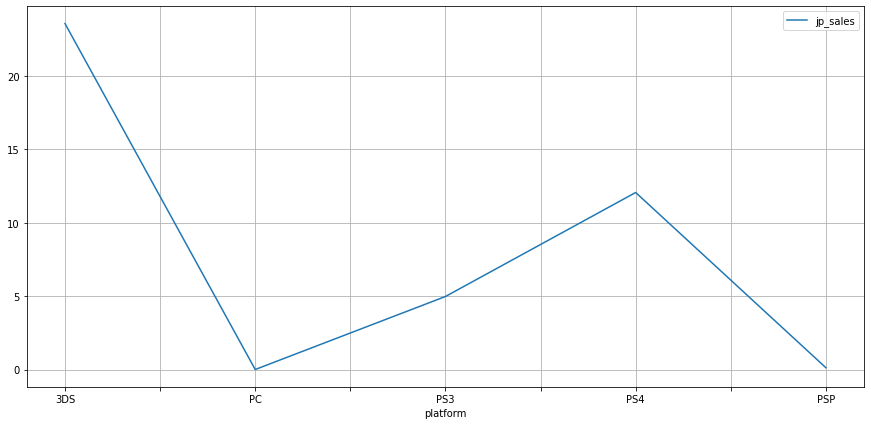

In [55]:
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').head(5).plot(grid=True, figsize=(15, 7))

В регионе NA и EU самая популярная платформа PS4, другие платформы занимают намного меньше долю. В регионе JP самая популярная платформа 3DS, на втором месте со значительным отстованием PS4, на удивление платформа PC вообще не пользуется спросом.

#### Самые популярные жанры (топ-5).

##### NA

<AxesSubplot:xlabel='genre'>

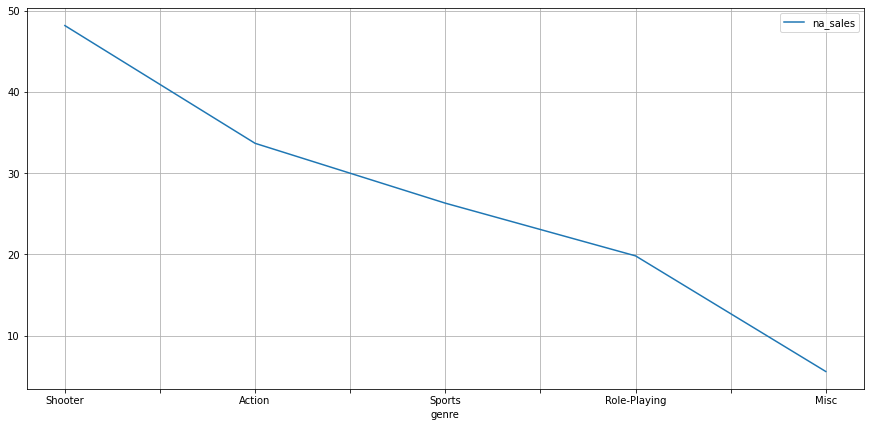

In [69]:
actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5).plot(grid=True, figsize=(15, 7))

##### EU

Самый популярный жанр это Action, он также в разы опережыет другие жанры

<AxesSubplot:xlabel='genre'>

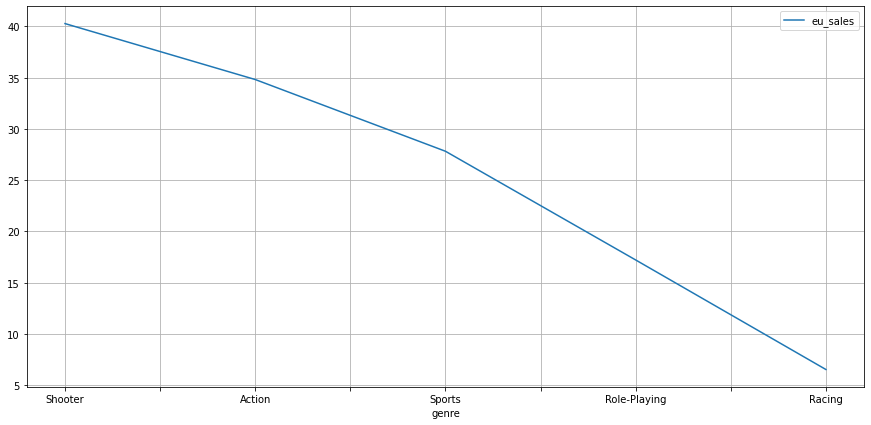

In [71]:
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5).plot(grid=True, figsize=(15, 7))

##### JP

<AxesSubplot:xlabel='genre'>

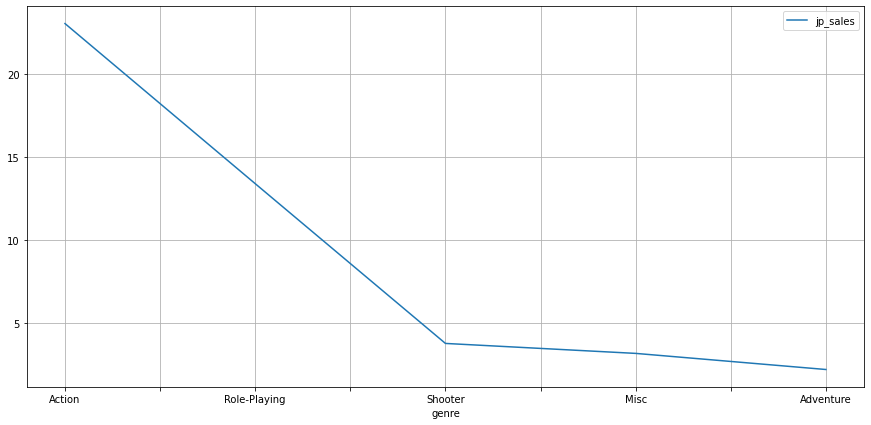

In [72]:
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5).plot(grid=True, figsize=(15, 7))

В регионах EU и NA ситуация схожа, самые популярные жанры Shooter и Action. Регионе JP ситуация другая лидер Action и на втором месте Role-Playing

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

##### NA

<AxesSubplot:ylabel='rating'>

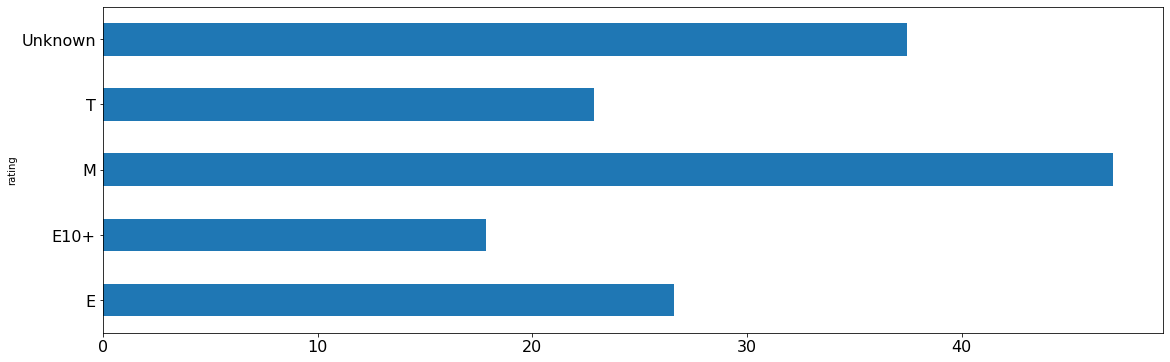

In [78]:
actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)

##### EU

<AxesSubplot:ylabel='rating'>

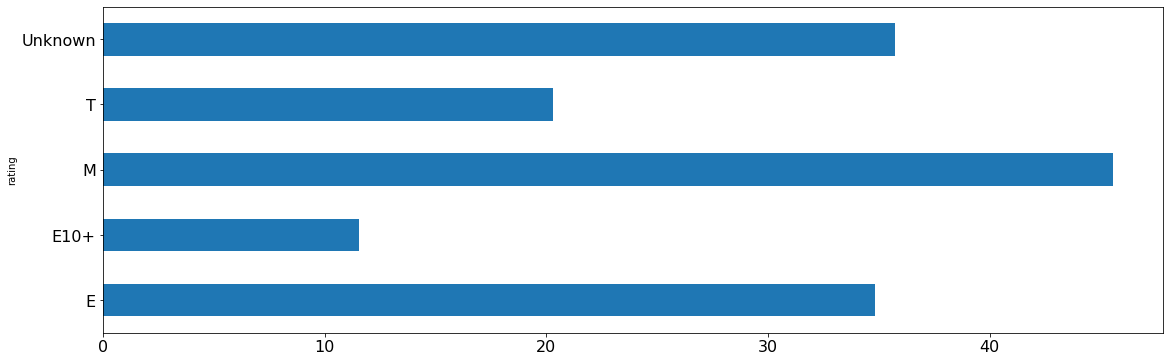

In [79]:
actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)

##### JP

<AxesSubplot:ylabel='rating'>

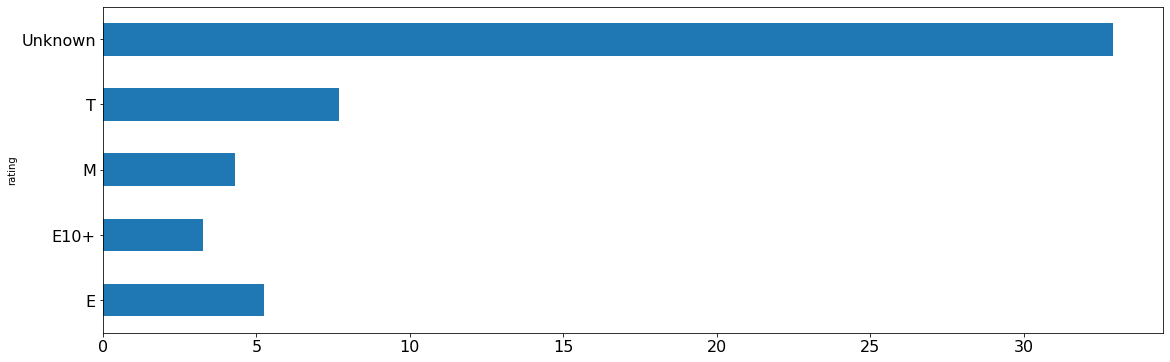

In [80]:
actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)

Судя по всему не влияет только в регион JP, т.к. очень много игр продается без категорий

### Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: средние рейтинги по платформам одинаковые
H1: средние рейтинги по платформам разные

In [85]:
data_xbox = actual_data[(actual_data['platform'] == 'XOne') & (~actual_data['user_score'].isnull())]['user_score']
data_pc = actual_data[(actual_data['platform'] == 'PC') & (~actual_data['user_score'].isnull())]['user_score']
alpha = .05
results = st.ttest_ind(data_xbox, data_pc)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


Вывод средние рейтинги по платформам одинаковые

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: средние рейтинги по жанрам одинаковые
H1: средние рейтинги по жанрам разные

In [82]:
data_action = actual_data[(actual_data['genre'] == 'Action') & (~actual_data['user_score'].isnull())]['user_score']
data_sports = actual_data[(actual_data['genre'] == 'Sports') & (~actual_data['user_score'].isnull())]['user_score']
alpha = .05
results = st.ttest_ind(data_action, data_sports)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.0012846807938657e-13
Отвергаем нулевую гипотезу


Вывод средние рейтинги по жанрам разные

### Напишите общий вывод

С 1994 года начинается бум создания видоигр и достигает своего пика в 2008-2009 годах и дальше с 2012 года наблюдаем значительное снижение производства видеоигр. Самая прибыльная платформа в последних годам исследования это PS4. Прогноз на 2017 год это нисходящий тренд по количеству вышедших игр и по прибыльности. При покупке видеоигр покупатели практически не смотрят на рейтинг от пользователей, немного смотрят на рейтинг от критиков. В регионе NA и EU самая популярная платформа PS4. В регионе JP самая популярная платформа 3DS. В регионах EU и NA самые популярные жанры Shooter и Action. В регионе JP самый популярный жанр это Action. Рейтинг ESRB судя по всему не влияет только в регион JP, т.к. очень много игр продается без категорий. Проверив гипотезы мы выяснили что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние пользовательские рейтинги жанров Action и Sports  разные.